<a href="https://colab.research.google.com/github/paragrafff22/dw_matrix_road_sign/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [16]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [20]:
model = Sequential([
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape = input_shape),
        Flatten(),
        Dense(num_classes, activation='softmax'),
])
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
flatten_3 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 43)                2476843   
Total params: 2,478,635
Trainable params: 2,478,635
Non-trainable params: 0
_________________________________________________________________
1088/1088 [==============================] - 3s 3ms/step - loss: 8.9380 - accuracy: 0.7965


In [21]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
  
  Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape ),
  
  Flatten(),
  
  Dense(num_classes, activation='softmax')
  ])

def train_model(model, X_train, y_train, params_fit={}):
  model.compile(
    loss='categorical_crossentropy', 
    optimizer='Adam', 
    metrics=['accuracy']
  )


  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train, 
      y_train,
      batch_size = params_fit.get('batch_size', 128), 
      epochs = params_fit.get('epochs', 5),
      verbose = params_fit.get('verbose', 1),
      validation_data = params_fit.get('validation_data', (X_train, y_train)),
      callbacks = [tensorboard_callback],
      )
  return model

get_cnn_v1(input_shape, num_classes).summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
flatten_4 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 43)                2476843   
Total params: 2,478,635
Trainable params: 2,478,635
Non-trainable params: 0
_________________________________________________________________


In [22]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 2s 9ms/step - loss: 45.3134 - accuracy: 0.7354 - val_loss: 0.2399 - val_accuracy: 0.9428
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2065 - accuracy: 0.9538 - val_loss: 0.1359 - val_accuracy: 0.9714
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1452 - accuracy: 0.9674 - val_loss: 0.0868 - val_accuracy: 0.9799
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.0912 - accuracy: 0.9787 - val_loss: 0.0779 - val_accuracy: 0.9818
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.0751 - accuracy: 0.9829 - val_loss: 0.0725 - val_accuracy: 0.9820


In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):

  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)

In [25]:
predict(model_trained, X_test, y_test)

0.8247165532879819

In [26]:
labels_dict[np.argmax(y_pred_prob[496])]

'Speed limit (30km/h)'

<BarContainer object of 43 artists>

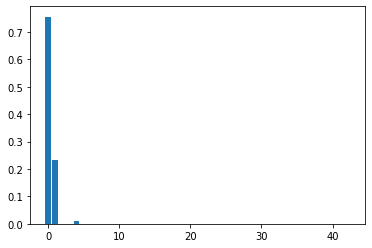

In [27]:
plt.bar(range(43),y_pred_prob[400])

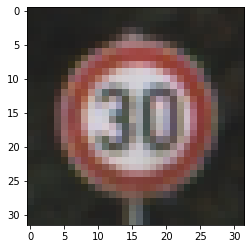

In [28]:
plt.imshow(X_test[496])

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

In [30]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
  ])

train_and_predict(get_cnn_v2(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 3s 9ms/step - loss: 4.6017 - accuracy: 0.3475 - val_loss: 1.0427 - val_accuracy: 0.7626
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 0.9426 - accuracy: 0.7194 - val_loss: 0.2726 - val_accuracy: 0.9392
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.4831 - accuracy: 0.8549 - val_loss: 0.1298 - val_accuracy: 0.9769
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.3151 - accuracy: 0.9061 - val_loss: 0.0756 - val_accuracy: 0.9874
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2406 - accuracy: 0.9283 - val_loss: 0.0512 - val_accuracy: 0.9901


0.9199546485260771

In [31]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
  ])

train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 2.8684 - accuracy: 0.3922 - val_loss: 0.4856 - val_accuracy: 0.8796
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.6349 - accuracy: 0.8167 - val_loss: 0.1574 - val_accuracy: 0.9724
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.3139 - accuracy: 0.9080 - val_loss: 0.0568 - val_accuracy: 0.9878
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2070 - accuracy: 0.9388 - val_loss: 0.0537 - val_accuracy: 0.9843
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1503 - accuracy: 0.9554 - val_loss: 0.0206 - val_accuracy: 0.9945


0.9666666666666667

In [32]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
  ])

train_and_predict(get_cnn_v4(input_shape, num_classes))


Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.4723 - accuracy: 0.3273 - val_loss: 0.9608 - val_accuracy: 0.6934
Epoch 2/5
272/272 [==============================] - 3s 13ms/step - loss: 0.8045 - accuracy: 0.7448 - val_loss: 0.1863 - val_accuracy: 0.9466
Epoch 3/5
272/272 [==============================] - 3s 13ms/step - loss: 0.3938 - accuracy: 0.8759 - val_loss: 0.0942 - val_accuracy: 0.9720
Epoch 4/5
272/272 [==============================] - 3s 12ms/step - loss: 0.2470 - accuracy: 0.9219 - val_loss: 0.0455 - val_accuracy: 0.9866
Epoch 5/5
272/272 [==============================] - 3s 13ms/step - loss: 0.1827 - accuracy: 0.9444 - val_loss: 0.0324 - val_accuracy: 0.9911


0.9775510204081632

In [33]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential ([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu',padding='same'),
    MaxPool2D(),
    Dropout(0.3), 

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3), 

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3), 

    Flatten(),

    Dense(1024, activation='relu'), 
    Dropout(0.3),    
    Dense(1024, activation='relu'), 
    Dropout(0.3),   

    Dense(num_classes, activation='softmax'), 
  ])

train_and_predict(get_cnn_v5(input_shape, num_classes ))

Epoch 1/5
272/272 [==============================] - 4s 15ms/step - loss: 2.6808 - accuracy: 0.2643 - val_loss: 1.2276 - val_accuracy: 0.5748
Epoch 2/5
272/272 [==============================] - 4s 14ms/step - loss: 0.9649 - accuracy: 0.6777 - val_loss: 0.3576 - val_accuracy: 0.8856
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.4829 - accuracy: 0.8418 - val_loss: 0.1123 - val_accuracy: 0.9668
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2924 - accuracy: 0.9086 - val_loss: 0.0755 - val_accuracy: 0.9797
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2191 - accuracy: 0.9351 - val_loss: 0.0458 - val_accuracy: 0.9860


0.9600907029478458

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray(X_test).reshape(-1, 32, 32, 1)

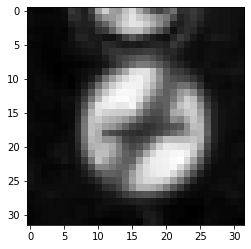

In [35]:
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'))

In [42]:
model = get_cnn_v5((32, 32, 1), num_classes)

model_trained = train_model(model, X_train_gray, y_train, params_fit ={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.4936 - accuracy: 0.2976 - val_loss: 0.6538 - val_accuracy: 0.8050
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.5275 - accuracy: 0.8298 - val_loss: 0.1181 - val_accuracy: 0.9608
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2356 - accuracy: 0.9241 - val_loss: 0.0590 - val_accuracy: 0.9839
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1588 - accuracy: 0.9502 - val_loss: 0.0350 - val_accuracy: 0.9903
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1212 - accuracy: 0.9624 - val_loss: 0.0279 - val_accuracy: 0.9920


0.9600907029478458

In [0]:

def preproc_img(img):
  hsv = color.rgb2hsv(img)
  hsv[:,:,2] = exposure.equalize_adapthist(hsv[:,:,2])
  img = color.hsv2rgb(hsv)

  return img

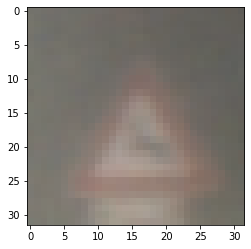

In [39]:
plt.imshow(X_train[400]);


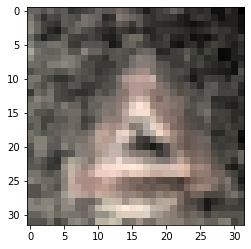

In [40]:
plt.imshow(preproc_img(X_train[400]));
